In [10]:
import numpy as np
import cv2

import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import platform

# Import matplotlib libraries
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import time

In [11]:
if platform.system() == "Darwin":
    root_directory = '/Users/lorenzobarbiero/Documents/GitHub/human_pose'
    data_directory = '/Users/lorenzobarbiero/Desktop/Università/VCS/Human Action Recognition'
else:
    root_directory = ''
    data_directory = '../human_pose_local/archive/Human Action Recognition'

print('root directory is ' + root_directory)
print('data directory is ' + data_directory)

root directory is 
data directory is ../human_pose_local/archive/Human Action Recognition


In [12]:
# file_name = 'movenet_thunder_mobilenet_small'
# file_name = 'movenet_lightning_mobilenet_large'
# file_name = 'movenet_thunder_mobilenet_large'
# file_name = 'movenet_lightning_mobilenet_small'

In [13]:
file_name = "movenet_thunder_mobilenet_large"

In [14]:
df = pd.read_pickle(data_directory + '/' + file_name + '.pkl')

In [15]:
# apply the function to the dataframe
df['keypoints'] = df['keypoints'].apply(lambda x: np.array(x))
df['object'] = df['object'].apply(lambda x: np.array(x).reshape(-1, 1))
df['obj_vector'] = df['obj_vector'].apply(lambda x: np.array(x))
df['category'] = df['category'].apply(lambda x: np.array(x))

In [16]:
# shape of the data
print('keypoints shape: ', df['keypoints'].iloc[0].shape)
print('object shape: ', df['object'].iloc[0].shape)
print('obj_vector shape: ', df['obj_vector'].iloc[0].shape)

keypoints shape:  (51,)
object shape:  (5, 1)
obj_vector shape:  (5, 100)


In [17]:
# set to 0 the keypoints with score < 0.3
def filter_keypoints(x):
    x[x[:, 2] < 0.3] = 0
    return x

# df['keypoints'] = df['keypoints'].apply(lambda x: filter_keypoints(x))

# keep only the positions of the keypoints
def get_positions(x):
    return x[:, :2]

# df['keypoints'] = df['keypoints'].apply(lambda x: get_positions(x))

# set to 0 the object with score < 0.1
def filter_object(x):
    x[x[:, 0] < 0.1] = 0
    return x

# df['object'] = df['object'].apply(lambda x: filter_object(x))

In [18]:
# number of object to consider
n_objects = 5

In [19]:
df['obj_input'] = df.apply(lambda x: np.sum(x['object'][-n_objects:]
                                            *x['obj_vector'][-n_objects:], axis=0), axis=1)
df['keypoints'] = df['keypoints'].apply(lambda x: x.flatten())

In [20]:
labels = df['category']
    
kpoints = df['keypoints']

df['input'] = df.apply(lambda x: np.concatenate((x['keypoints'], x['obj_input'])), axis=1)

In [23]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

X = np.array(df['input'].to_list())
y = np.array(labels)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

In [33]:
y

array([11, 14,  7, ..., 11,  3,  9])

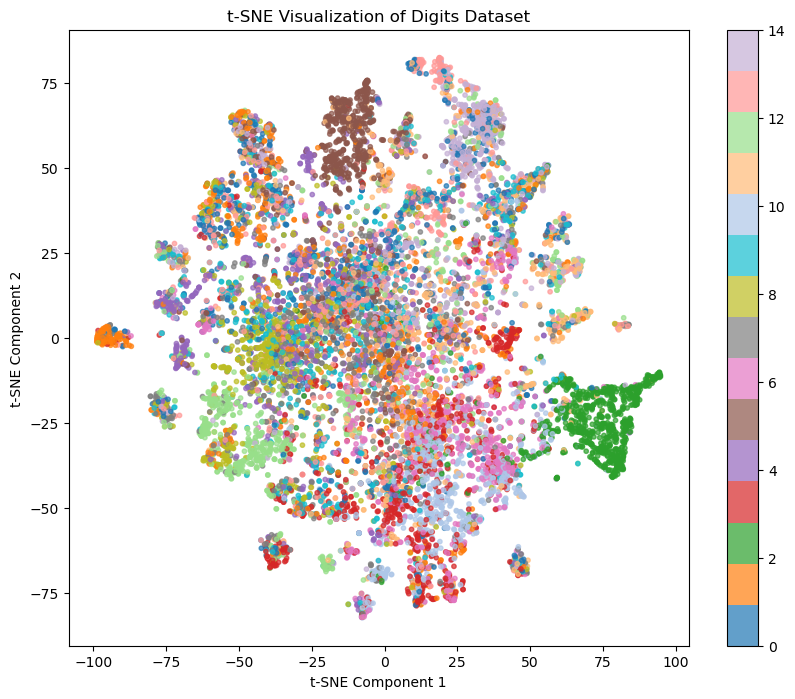

In [37]:
# Plot the t-SNE results
plt.figure(figsize=(10, 8))

from matplotlib.colors import ListedColormap

# Definiamo 15 colori distinti
colors = [
    "#1f77b4",  # blu
    "#ff7f0e",  # arancione
    "#2ca02c",  # verde
    "#d62728",  # rosso
    "#9467bd",  # viola
    "#8c564b",  # marrone
    "#e377c2",  # rosa
    "#7f7f7f",  # grigio
    "#bcbd22",  # giallo-verde
    "#17becf",  # ciano
    "#aec7e8",  # azzurro chiaro
    "#ffbb78",  # arancione chiaro
    "#98df8a",  # verde chiaro
    "#ff9896",  # rosso chiaro
    "#c5b0d5"   # viola chiaro
]

# Creiamo la colormap
cmap = ListedColormap(colors)
                      
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap, s=10, alpha=0.7)

plt.colorbar(scatter)
plt.title('t-SNE Visualization of the Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [40]:
# get the label from the category

labels_names = df.groupby('category').first()['label']

labels_names = np.array(labels_names).tolist()

labels_names[9] = 'music'

labels_names

['calling',
 'clapping',
 'cycling',
 'dancing',
 'drinking',
 'eating',
 'fighting',
 'hugging',
 'laughing',
 'music',
 'running',
 'sitting',
 'sleeping',
 'texting',
 'using_laptop']